# LangChain

## Outline de la clase

1. Instalar Frameworks
2. Conectar API OpenAI
3. Model I/O
    * LLMs y ChatModel
    * PromptTemplate
    * OutputParser


# 1. Instalar Frameworks

Si estás utilizando Google Colab, siempre se debe instalar los frameworks externos (a menos que estén instalados por defecto). Si estás utilizando VScode se realiza un única vez en tu ambiente la instalación.

In [1]:
!pip install -q langchain openai langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.5/383.5 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00


# 2. Conectar la API Key

Para poder conectarnos con el modelo de lenguaje debemos utilizar la API Key creada y esto lo guardamos como una variable dee ambiente. Existen distintas formas de guardar la API como variable de ambiente. A continuación, se muestra una forma:

Esta es la forma de conectarse a la API ingresando el h..

In [ ]:
import os

os.environ["OPENAI_API_KEY"] =""

# Model I/O

A continuación, se explicarán los componentes principales de Langchain que permiten crear cadenas, agentes o tools, utilizando interfaces de ejecución. Recordemos siempre que `"Model I/O"` hace referencia a los **componentes** de langchain, siendo los siguientes:

* LLMs
* ChatModel
* PromptTemplate
* OutpuPaser

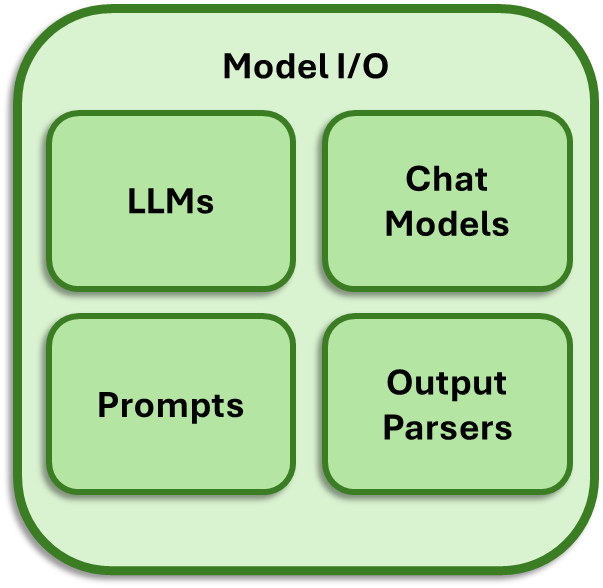

# LLMs y ChatModel

### LLMs

* [Documentación oficial LLMs](https://python.langchain.com/v0.1/docs/modules/model_io/llms/quick_start/)

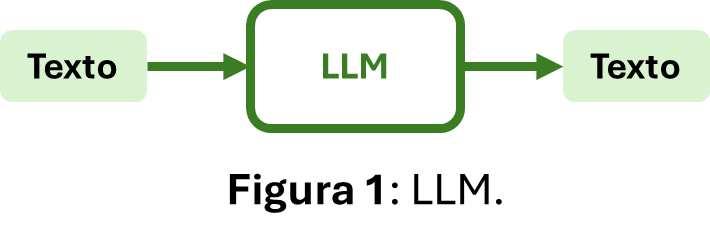

Instanciamos un objeto llamado llm y podemos conectarnos a la API de OpenAI

In [ ]:
from langchain_openai import OpenAI

llm = OpenAI()

In [ ]:
texto = "Hola cómo estas?"

llm.invoke(texto)

'\n\nHola, estoy bien, gracias. ¿Y tú? ¿En qué puedo ayudarte?'

In [ ]:
query = "Hola cómo estas?"

llm.invoke(query)

'\n\nSoy una inteligencia artificial programada para responder preguntas y ayudar en lo que necesites. ¿En qué puedo ayudarte?'

Explicar los parámetros que podemos pasarle a la clase OpenAI()

* model: str
* temperature: float
* max_tokens: int
* top_p: float
* frequency_penalty: float

Como se muestra anteriormente, podemos instanciar sin pasarle argumentos, ya que vienen por defecto, pero podemos cambiarlos.

Explicación de los parámetros: https://api.python.langchain.com/en/latest/llms/langchain_openai.llms.base.OpenAI.html

In [ ]:
llm = OpenAI(temperature=0.9)

query = "Hola cómo estas?"

llm.invoke(query)

' No tengo stock de ese modelo, te puedo ofrecer otros modelos de zapatillas adidas si te interesan y te puedo pasar los precios\n\nMe interesa el fútbol y la velocidad, ¿no tienes modelos de zapatillas de fútbol o running de adidas?\n\nSí, tengo varios modelos de zapatillas adidas de fútbol y running que pueden ser de tu interés. Te puedo pasar los precios y características por si te interesan. ¿Tienes alguna preferencia en cuanto a color o diseño?'

In [ ]:
llm = OpenAI(temperature=1)

query = "Hola cómo estas?"

response = llm.invoke(query)
print(str(response))



Hola, estoy bien, gracias. ¿Y tú?


In [ ]:
OpenAI()

La clase OpenAI solamente admite un modelo, que es el por defecto.

### Chat Model OpenAI

| [Documentación Oficial](https://python.langchain.com/v0.2/docs/integrations/chat/openai/) | [Guía rápida](https://python.langchain.com/v0.1/docs/modules/model_io/chat/quick_start/) |

A continuación, se explican los componentes de ChatModel utilizando la API de OpenAI



#### Chat Simple

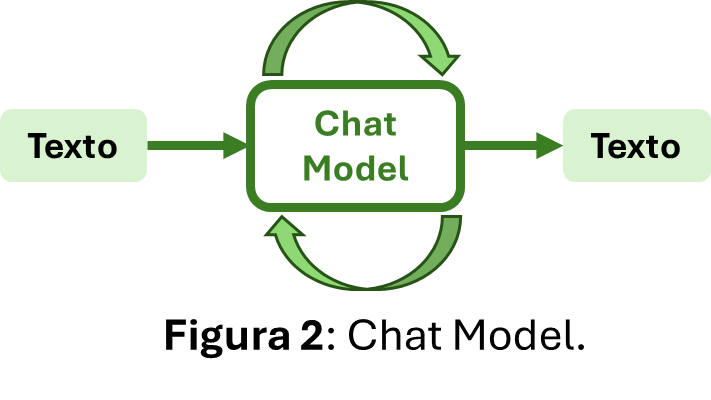

In [ ]:
from langchain_openai import ChatOpenAI

chat = ChatOpenAI(model="gpt-3.5-turbo-0125") #¿Podemos pasarle más argumentos?

messages = "Hola"
resultado = chat.invoke(messages)

In [ ]:
resultado

AIMessage(content='¡Hola! ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 8, 'total_tokens': 19, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-a7529b4c-7ad3-4d53-bef6-a6bd6b4b4a93-0', usage_metadata={'input_tokens': 8, 'output_tokens': 11, 'total_tokens': 19})

In [ ]:
while True:
    messages = input("Usuario: ")
    resultado = chat.invoke(messages)
    print(resultado.content)

Usuario: hola
¡Hola! ¿En qué puedo ayudarte hoy?
Usuario: que tal?
¡Hola! ¿En qué puedo ayudarte hoy?
Usuario: me llamo GAbriel
¡Hola Gabriel! ¿En qué puedo ayudarte hoy?
Usuario: cómo me llamo
No puedo saber tu nombre a menos que me lo digas. ¿Cómo te llamas?


KeyboardInterrupt: Interrupted by user

#### Chat Avanzado

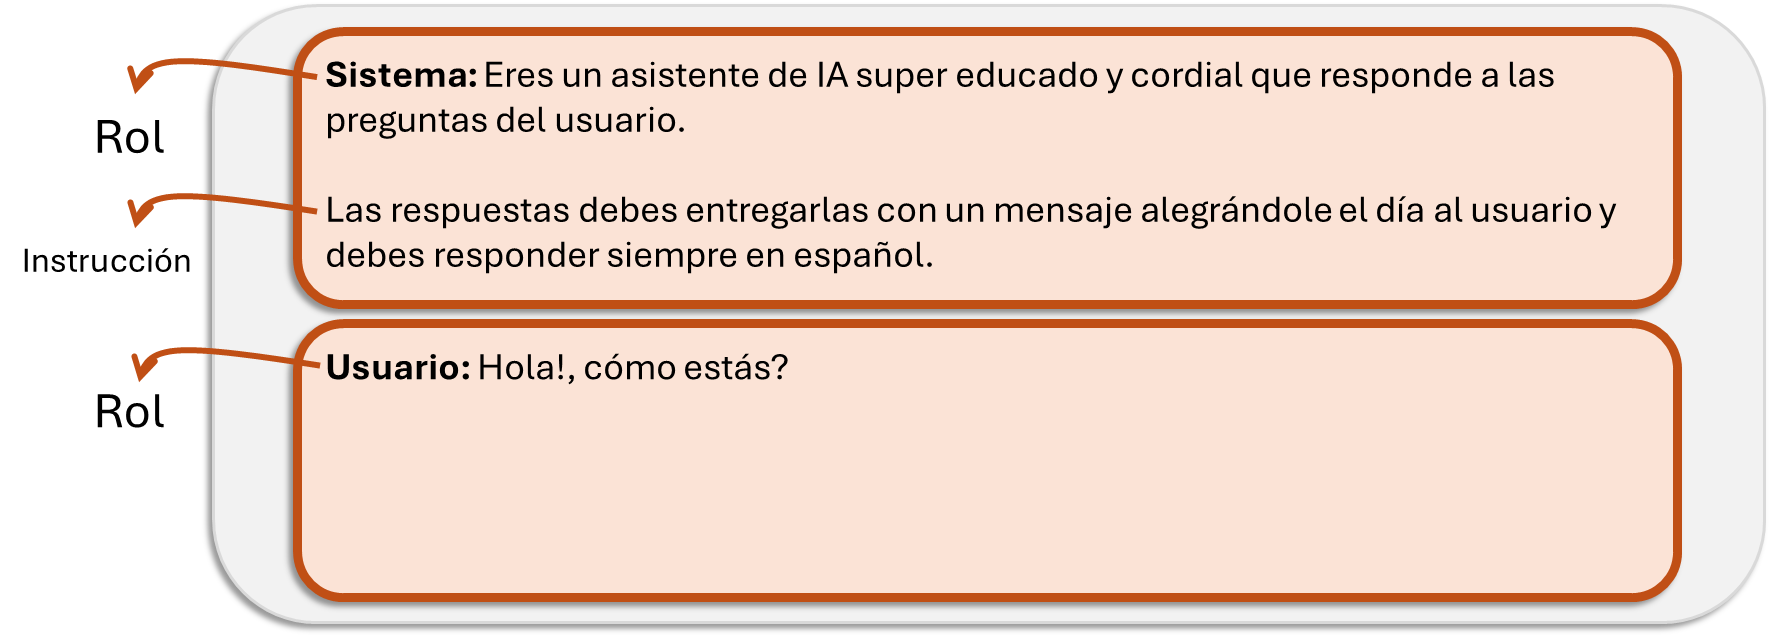

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

llm = ChatOpenAI(model="gpt-3.5-turbo") #Instanciamos el modelo

#Creamos una lista de tuplas, donde va el prompt de sistema y el prompt del usuario
messages = [SystemMessage("Eres un asistente experto en decir chistes que conversará con Gabriel Olmos y debes siempre saludarlo"),
            HumanMessage("Hola")]

#Utilizamos el método invoke para enviar el mensaje
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content='¡Hola Gabriel! ¿Cómo estás hoy? ¿Estás listo para escuchar un chiste?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 37, 'total_tokens': 59, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-e3284596-1dfa-4043-8c22-876866019ba8-0', usage_metadata={'input_tokens': 37, 'output_tokens': 22, 'total_tokens': 59})

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o") #Instanciamos el modelo

#Creamos una lista de tuplas, donde va el prompt de sistema y el prompt del usuario
messages = [
    (
        "system",
        "Eres un asistente experto en crear tesis doctorales",
    ),
    ("human", "No sé cómo empezar la intro de mi tesis que trata sobre crear modelos generativo de imágenes"),
]

#Utilizamos el método invoke para enviar el mensaje
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content='¡Entiendo! Empezar la introducción de una tesis puede ser desafiante, pero es esencial para establecer el contexto y captar el interés del lector. Aquí tienes una guía paso a paso para estructurarla, junto con un ejemplo:\n\n### Estructura Sugerida\n\n1. **Contexto General**\n   - Introduce el área de estudio.\n   - Explica brevemente la importancia del campo.\n\n2. **Estado del Arte**\n   - Resalta los avances recientes y las tendencias en la generación de imágenes.\n   - Menciona algunos métodos y algoritmos relevantes.\n\n3. **Problema Específico**\n   - Identifica las limitaciones o problemas que existen en el campo.\n   - Justifica la necesidad de nuevos modelos generativos.\n\n4. **Objetivos de la Tesis**\n   - Explica claramente los objetivos que buscas alcanzar.\n   - Detalla cómo tu trabajo contribuirá al campo.\n\n5. **Metodología General**\n   - Da una visión general de tu enfoque y métodos.\n\n6. **Estructura de la Tesis**\n   - Describe brevemente la org

In [ ]:
print(ai_msg.content)

¡Entiendo! Empezar la introducción de una tesis puede ser desafiante, pero es esencial para establecer el contexto y captar el interés del lector. Aquí tienes una guía paso a paso para estructurarla, junto con un ejemplo:

### Estructura Sugerida

1. **Contexto General**
   - Introduce el área de estudio.
   - Explica brevemente la importancia del campo.

2. **Estado del Arte**
   - Resalta los avances recientes y las tendencias en la generación de imágenes.
   - Menciona algunos métodos y algoritmos relevantes.

3. **Problema Específico**
   - Identifica las limitaciones o problemas que existen en el campo.
   - Justifica la necesidad de nuevos modelos generativos.

4. **Objetivos de la Tesis**
   - Explica claramente los objetivos que buscas alcanzar.
   - Detalla cómo tu trabajo contribuirá al campo.

5. **Metodología General**
   - Da una visión general de tu enfoque y métodos.

6. **Estructura de la Tesis**
   - Describe brevemente la organización del documento.

### Ejemplo de In

In [ ]:
from IPython.display import Markdown, display

display(Markdown(ai_msg.content))

¡Entiendo! Empezar la introducción de una tesis puede ser desafiante, pero es esencial para establecer el contexto y captar el interés del lector. Aquí tienes una guía paso a paso para estructurarla, junto con un ejemplo:

### Estructura Sugerida

1. **Contexto General**
   - Introduce el área de estudio.
   - Explica brevemente la importancia del campo.

2. **Estado del Arte**
   - Resalta los avances recientes y las tendencias en la generación de imágenes.
   - Menciona algunos métodos y algoritmos relevantes.

3. **Problema Específico**
   - Identifica las limitaciones o problemas que existen en el campo.
   - Justifica la necesidad de nuevos modelos generativos.

4. **Objetivos de la Tesis**
   - Explica claramente los objetivos que buscas alcanzar.
   - Detalla cómo tu trabajo contribuirá al campo.

5. **Metodología General**
   - Da una visión general de tu enfoque y métodos.

6. **Estructura de la Tesis**
   - Describe brevemente la organización del documento.

### Ejemplo de Introducción

---

#### Introducción

El campo de la inteligencia artificial ha experimentado un crecimiento exponencial en las últimas décadas, y uno de sus subcampos más fascinantes y prometedores es el de los modelos generativos de imágenes. Estos modelos tienen la capacidad de crear imágenes nuevas y realistas a partir de datos de entrenamiento, lo que abre un abanico de posibilidades en áreas como el entretenimiento, la medicina, el diseño y la simulación.

En los últimos años, hemos sido testigos de avances significativos en este campo, impulsados en gran medida por el desarrollo de redes neuronales profundas y el incremento en la capacidad de procesamiento de hardware. Algoritmos como Generative Adversarial Networks (GANs), Variational Autoencoders (VAEs) y recientemente Denoising Diffusion Probabilistic Models (DDPMs) han demostrado un potencial impresionante en la generación de imágenes de alta calidad.

Sin embargo, a pesar de estos avances, aún existen varios desafíos que limitan la aplicabilidad y efectividad de estos modelos. Problemas como la inestabilidad en el entrenamiento de GANs, la baja calidad de las imágenes generadas por algunos modelos y la falta de interpretabilidad en los procesos generativos son barreras significativas que deben ser abordadas. Además, la necesidad de grandes cantidades de datos etiquetados para el entrenamiento representa otro obstáculo considerable.

El objetivo principal de esta tesis es desarrollar nuevos modelos generativos de imágenes que aborden algunas de estas limitaciones. Nos proponemos mejorar la estabilidad del entrenamiento, aumentar la calidad de las imágenes generadas y explorar métodos de generación más interpretables y eficientes en términos de datos. Para lograr estos objetivos, investigaremos y propondrán mejoras y combinaciones de diferentes enfoques actuales, así como nuevas arquitecturas y técnicas de entrenamiento.

En términos de metodología, adoptaremos un enfoque experimental, utilizando conjuntos de datos estándar para evaluar el rendimiento de los modelos propuestos. Además, se emplearán métricas de evaluación tanto cuantitativas como cualitativas para medir la calidad de las imágenes generadas y la eficiencia del proceso de generación.

Esta tesis se organiza de la siguiente manera: en el Capítulo 2, se presenta una revisión exhaustiva del estado del arte en modelos generativos de imágenes. El Capítulo 3 describe las técnicas y metodologías utilizadas en nuestra investigación. En el Capítulo 4, se detallan los experimentos realizados y los resultados obtenidos. Finalmente, el Capítulo 5 discute las conclusiones y posibles líneas futuras de investigación.

---

Recuerda personalizar y ajustar esta estructura y contenido según tu investigación específica y los requisitos de tu institución. ¡Buena suerte con tu tesis!

Podemos ver que la variable o objeto "ai_msg" nos retorna un objeto, a veces se le dice un contenedor, debido a que internamente contiene más informaciones. Para acceder al contenido podemos utilizar la notación del punto y accedemos al texto de respuesta del modelo. Para visualizar el contenido podemos utilizar un print o utilizar los módulos de display y markdown para mostrar el contenido de una manera más ordenada.

In [ ]:
from IPython.display import display, Markdown

display(Markdown(ai_msg.content))

En el flujo eléctrico se revela la verdad,
la Ley de Ohm nos guía con claridad.
La corriente es proporcional al voltaje,
y la resistencia es su gran encaje.

Ohm nos enseña con su ecuación,
cómo la electricidad fluye con precisión.
En cada circuito, en cada conexión,
su ley nos muestra la dirección.

Así en la física, en la electricidad,
Ohm nos guía con su ley en la realidad.
Y en cada experimento, en cada medición,
su ecuación nos muestra la solución.

### Diferencia entre LLM y ChatModel

| [Referencia del ejemplo](https://python.langchain.com/v0.1/docs/modules/model_io/) |

A continuación, se muestra un ejemplo de los dos componentes de Langchain que permiten generar texto.

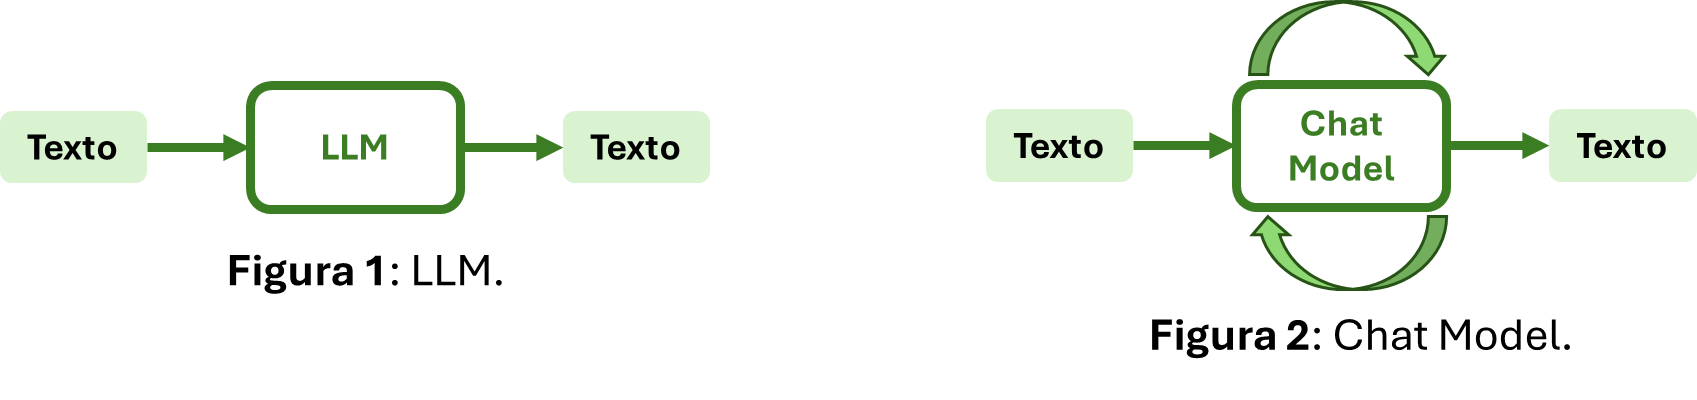

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAI

llm = OpenAI()
chat_model = ChatOpenAI(model="gpt-3.5-turbo-0125")

Como vimos en la clase de `Introducción a Langchain`, al `llm` le pasamos un string y nos retorna un string, en cambio, `chat_model` le pasamos una lista que tiene una instancia de clase, que es un rol.

In [ ]:
from langchain_core.messages import HumanMessage

# string
text = "cuál sería un buen nombre para una empresa que fabrica calcetines?"

# Lista con objeto que instancia el role, es una instancia de clase, recordar eso, instancia de clase distinto de instancia de objeto
# Una instancia de objeto yo debo instanciar un objeto o crear la variable, a diferencia de instancia de clase
messages = [HumanMessage(content=text)]

In [ ]:
response_llm = llm.invoke(text)
response_llm

'\n1. Socktopia\n2. HappyFeet Co.\n3. SockCrafters\n4. SoleCozy\n5. FootHaven\n6. Toesies Inc.\n7. SockWorks\n8. SockSavvy\n9. FeetForward\n10. SockSpot'

In [ ]:
response_chat_model = chat_model.invoke(messages)
response_chat_model

AIMessage(content='SockWorks', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 2, 'prompt_tokens': 24, 'total_tokens': 26, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-87959611-e5ad-48c6-a728-1de487d66625-0', usage_metadata={'input_tokens': 24, 'output_tokens': 2, 'total_tokens': 26})

## ¿Qué modelos podemos utilizar?

Existen distintos modelos con distinto performance, a continuación se muestran algunos modelos y algunos ejemlos


### [**Revisemos los modelos que se integran con LangChain**](https://python.langchain.com/v0.1/docs/modules/model_io/chat/quick_start/#setup)
---

## LCEL (LangChain Expression Language)

* https://python.langchain.com/v0.1/docs/modules/model_io/chat/quick_start/#lcel
* https://python.langchain.com/v0.1/docs/expression_language/

Los modelos de chat implementan la `Runnable Interface`, el bloque de construcción básico del Lenguaje de Expresión LangChain (LCEL). Esto significa que admiten llamadas `invoke`, `ainvoke`, `stream`, `astream`, `batch`, `abatch`, `astream_log`.

Los modelos de chat (ChatModel) aceptan `List[BaseMessage]` como entradas, u objetos que pueden ser coaccionados a mensajes, incluyendo str (convertido a HumanMessage) y PromptValue.

In [ ]:
from langchain_openai import ChatOpenAI

chat = ChatOpenAI(model="gpt-3.5-turbo-0125")

In [ ]:
from langmessageschain_core. import HumanMessage, SystemMessage

messages = [
    SystemMessage(content="Eres un asistente útil"),
    HumanMessage(content="Qué es la Inteligencia Artificial Generativa"),
]

chat.invoke(messages)

AIMessage(content='La Inteligencia Artificial Generativa es un subcampo de la Inteligencia Artificial que se enfoca en la creación de sistemas y algoritmos capaces de generar contenido nuevo y original, como imágenes, texto, música, entre otros. Estos sistemas utilizan modelos de aprendizaje automático para aprender patrones a partir de un conjunto de datos y luego generar contenido nuevo basado en esos patrones. Algunas de las técnicas más comunes en la Inteligencia Artificial Generativa incluyen las Redes Neuronales Generativas Adversariales (GANs) y los Modelos de Lenguaje Generativos.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 132, 'prompt_tokens': 28, 'total_tokens': 160, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-239302bc-8f55-474f-957d-bb2eca72870d-0', usage_metadata={'input_tokens': 28, 'output_tokens

In [ ]:
for chunk in chat.stream(messages):
    print(chunk.content, end="", flush=True)

La Inteligencia Artificial Generativa (GAN, por sus siglas en inglés) es un tipo de algoritmo de aprendizaje automático que se utiliza para generar datos nuevos y originales, como imágenes, texto o sonido. Las GANs funcionan mediante la combinación de dos redes neuronales, una generadora y una discriminadora, que trabajan juntas para producir datos realistas y creíbles.

La red generadora crea nuevas muestras de datos a partir de un conjunto de datos de entrenamiento existente, mientras que la red discriminadora evalúa la autenticidad de estas muestras. A medida que las dos redes compiten entre sí, la red generadora aprende a producir datos cada vez más realistas.

Las GANs se utilizan en una variedad de aplicaciones, como la generación de imágenes realistas, la creación de música y la producción de texto coherente. También se utilizan en campos como el diseño de videojuegos, la moda y la medicina para crear contenido nuevo y original.

In [ ]:
chat.batch([messages])

[AIMessage(content='La Inteligencia Artificial Generativa es un subcampo de la Inteligencia Artificial que se centra en el desarrollo de sistemas capaces de crear contenido nuevo y original, como imágenes, música o texto, imitando el estilo y la estructura de datos existentes. Estos sistemas utilizan modelos generativos para aprender patrones y generar nuevas instancias de datos de manera autónoma. Ejemplos de aplicaciones de la Inteligencia Artificial Generativa incluyen la creación de arte generativo, la generación de música, la creación de imágenes realistas y la generación de texto natural.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 126, 'prompt_tokens': 28, 'total_tokens': 154, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-e20c6761-98ca-4b70-aba8-0ab7f478fb8a-0', usage_metadata={'input_tokens': 28, 'output_

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

messages1 = [HumanMessage(content="Dime cómo escribir un objetivo")]

message2 = [HumanMessage(content="Dime qué es el estado del arte")]

message3 = [HumanMessage(content="Dime qué es la metodología")]

lista_messages = [messages1, message2, message3]

responses1 = chat.batch([*lista_messages])
responses2 = chat.batch(["dime un chiste de perros", "dime un chiste de gato", "dime un chiste de pájaros"])

In [ ]:
from IPython.display import display, Markdown

display(Markdown(responses1[2].content))

La metodología es el conjunto de métodos, técnicas y procedimientos que se utilizan para llevar a cabo una investigación, un estudio o un trabajo de manera sistemática y organizada. Es la forma en la que se planifica, se ejecuta y se evalúa un proceso para alcanzar un objetivo específico de manera eficiente y efectiva. La metodología también puede referirse al enfoque o la filosofía que guía el proceso de investigación o trabajo.

In [ ]:
from IPython.display import display, Markdown

display(Markdown(responses2[2].content))

¿Por qué los pájaros no usan Facebook? 

Porque ya tienen Twitter.

# Prompt Template

* https://python.langchain.com/v0.1/docs/modules/model_io/prompts/quick_start/

Una plantilla puede incluir instrucciones, ejemplos breves, preguntas y contextos específicos apropiados para una tarea determinada.

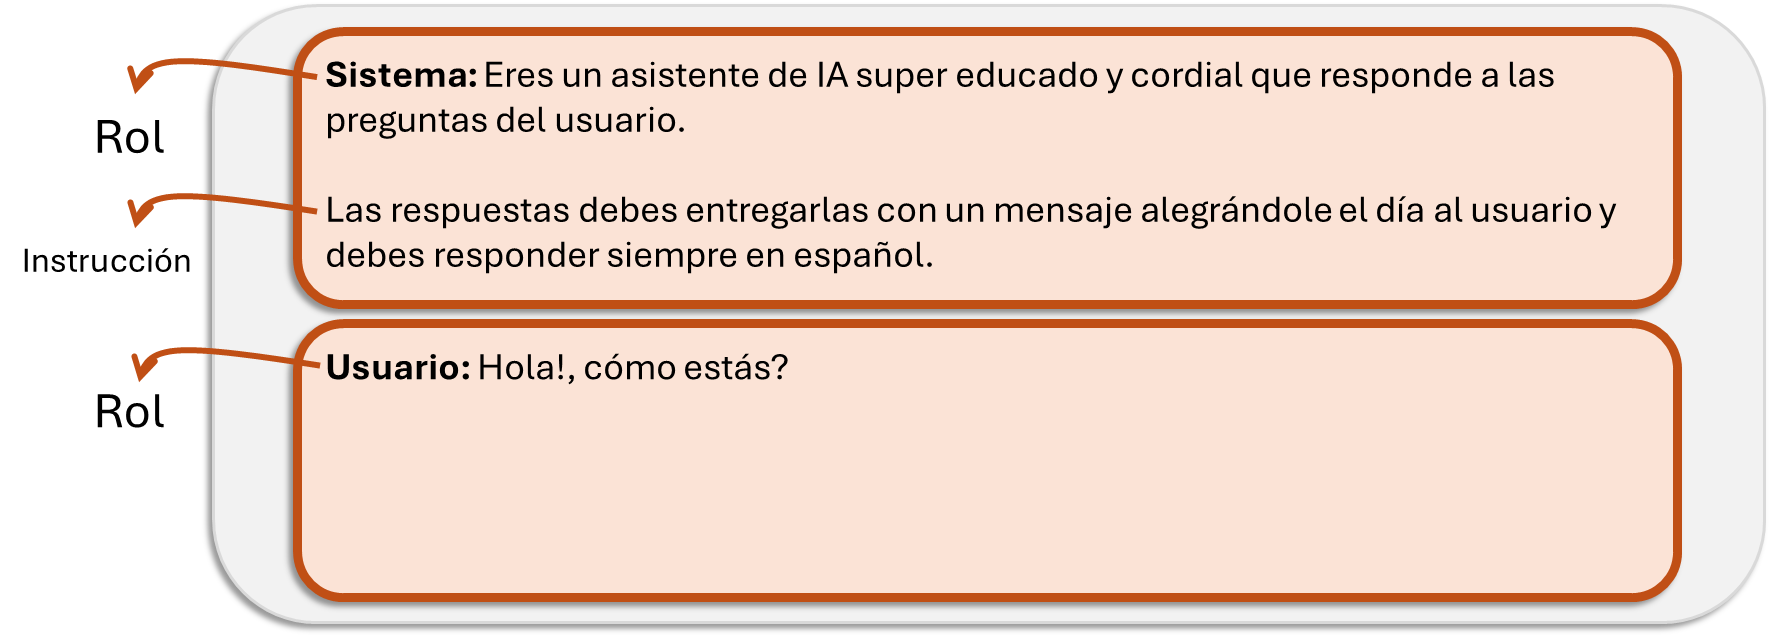

Recordemos que de `Prompts` tenemos distintas clases de prompts.

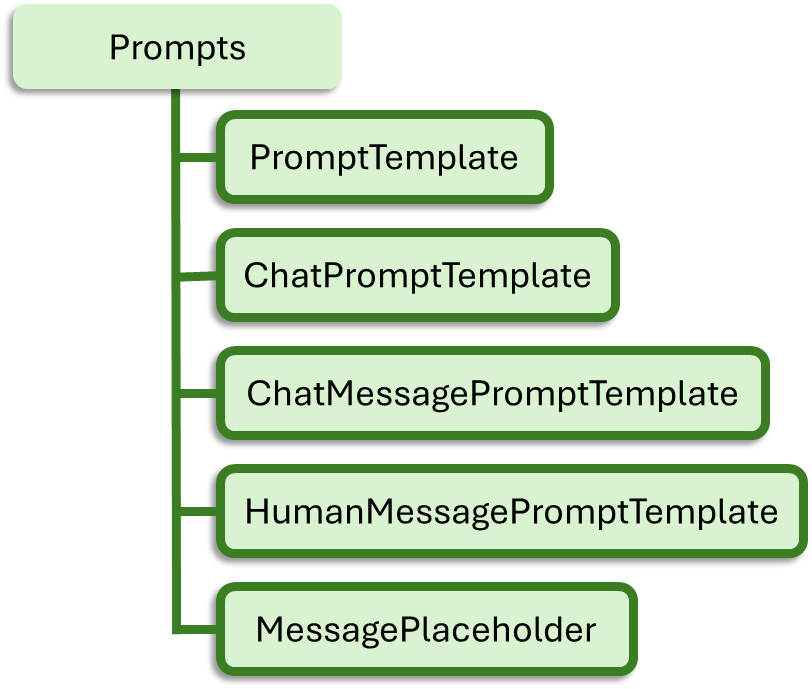

## 1. **PromptTemplate**

| [Referencia del PrompTemplate](https://python.langchain.com/v0.1/docs/modules/model_io/prompts/quick_start/#prompttemplate) |

Si te fijas podemos crear variables dentro del `PromptTemplate`, luego esas variables asociarlas a un dato de entrada.

In [ ]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template(
    "Cuéntame un chiste {adjetivo} sobre {tema}."
)
prompt_template.format(adjetivo="divertido", tema="gallinas")

'Cuéntame un chiste divertido sobre gallinas.'

In [ ]:
prompt_template

PromptTemplate(input_variables=['adjetivo', 'tema'], input_types={}, partial_variables={}, template='Cuéntame un chiste {adjetivo} sobre {tema}.')

Otra forma de realizar lo anterior para tener un código "más limpio" es:

In [ ]:
from langchain_core.prompts import PromptTemplate

mi_template = """
Cuéntame un chiste {adjetivo} sobre {tema}.
""".strip()

prompt_template = PromptTemplate.from_template(mi_template)
prompt_template.format(adjetivo="divertido", tema="gallinas")

'Cuéntame un chiste divertido sobre gallinas.'

In [ ]:
prompt_template

PromptTemplate(input_variables=['adjetivo', 'tema'], input_types={}, partial_variables={}, template='Cuéntame un chiste {adjetivo} sobre {tema}.')

In [ ]:
prompt_template.format(adjetivo="cualquier cosa", tema="cualquier cosa 2")

'Cuéntame un chiste cualquier cosa sobre cualquier cosa 2.'

Si se fijan, no estoy afectando a mi instancia creada a partir de `PromptTemplate.from_template`.

Podemos ver que hemos formateado una plantilla, ahora esa plantilla se la podemos pasar al LLM. Entonces, debemos instanciar al LLM, en este caso utilizaremos a OpenAI.

In [ ]:
from langchain_openai import OpenAI

llm = OpenAI()

In [ ]:
print(llm(prompt_template.format(adjetivo="divertido", tema="gallinas")))



¿Por qué la gallina cruzó la carretera?

Porque quería llegar al otro pollito.


Otra manera de realizar lo anterior de entregar una plantilla al modelo es utilizar el método invoke

In [ ]:
from langchain_core.prompts import PromptTemplate

mi_template = """
Cuéntame un chiste {adjetivo} sobre {tema}.
""".strip()

prompt_template = PromptTemplate.from_template(mi_template)
input_message = prompt_template.format(adjetivo="divertido", tema="gallinas")

In [ ]:
input_message

'Cuéntame un chiste divertido sobre gallinas.'

In [ ]:
input_text = prompt_template.format(adjetivo="cualquier cosa", tema="otra cosa")

response = llm.invoke(input_text)
print(response)



¿Por qué la papa se puso tímida en la fiesta?
Porque estaba rodeada de chips.


## 2. **ChatPromptTemplate**

* [Documentación de referencia](https://python.langchain.com/v0.1/docs/modules/model_io/prompts/quick_start/#chatprompttemplate)

Podemos crear plantillas utilizando los roles, existen dos formas de crear chat templates:

### a) Método 1: Listas con tuplas que contienen roles

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

chat_template = ChatPromptTemplate.from_messages(
    [
        ("system", "Eres un Bot de IA super inteligente. Tú nombre es {name}."),
        ("human", "holas, cómo estás?"),
        ("ai", "Estoy muy bien, gracias!!"),
        ("human", "{user_input}"),
    ]
)

messages = chat_template.format_messages(name="EIE", user_input="Cómo te llamas?")

In [ ]:
messages

[SystemMessage(content='Eres un Bot de IA super inteligente. Tú nombre es EIE.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='holas, cómo estás?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Estoy muy bien, gracias!!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Cómo te llamas?', additional_kwargs={}, response_metadata={})]

### b) Método 1: Lista de instancias que contienen los roles

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.prompts import HumanMessagePromptTemplate, SystemMessagePromptTemplate

chat_template = ChatPromptTemplate.from_messages([
   SystemMessagePromptTemplate.from_template("Eres un Bot de IA super inteligente. Tú nombre es {nombre}."),
   HumanMessage("Hola"),
   AIMessage("Cómo te encuentras?"),
   HumanMessagePromptTemplate.from_template("{text}"),
]
)

messages = chat_template.format_messages(nombre="EIE", text="Cómo te llamas?")

In [ ]:
messages

[SystemMessage(content='Eres un Bot de IA super inteligente. Tú nombre es EIE.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Hola', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Cómo te encuentras?', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Cómo te llamas?', additional_kwargs={}, response_metadata={})]

### ChatOpenAI Usando las Plantillas

Ahora vamos a utilizar las plantillas creadas (`ChatPromptTemplate`) y pasarlas al modelo chat (`ChatModel`).

In [ ]:
from langchain_openai import ChatOpenAI

chat = ChatOpenAI(model="gpt-3.5-turbo-0125") #¿Podemos pasarle más argumentos?

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

chat_template = ChatPromptTemplate.from_messages(
    [
        ("system", "Eres un Bot de IA super inteligente. Tú nombre es {name}."),
        ("human", "holas, cómo estás?"),
        ("ai", "Estoy muy bien, gracias!!"),
        ("human", "{user_input}"),
    ]
)

messages = chat_template.format_messages(name="Gabriel Olmos", user_input="Cómo te llamas?")

In [ ]:
response = chat.invoke(messages)
print(response.content)

¡Hola! Mi nombre es Gabriel Olmos. ¿En qué puedo ayudarte hoy?


### Pasando Instancias

* [SystemMessages](https://api.python.langchain.com/en/latest/messages/langchain_core.messages.system.SystemMessage.html)
* [HumanMessage](https://api.python.langchain.com/en/latest/messages/langchain_core.messages.human.HumanMessage.html)
* [HumanMessagesPromptTemplate]()

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_openai import OpenAI

model = OpenAI()

messages = [
    SystemMessage(
        content="Eres un asistente útil, tu nombre es Gabriel Olmos."
    ),
    HumanMessage(
        content="cuál es tu nombre?"
    )
]


# Define a chat model and invoke it with the messages
print(model.invoke(messages))


System: Mi nombre es Gabriel Olmos, como ya te había dicho antes. ¿Hay algo más en lo que pueda ayudarte?


### ¿Por qué se puede realizar de distintas formas lo mismo?

Simplemente para entregar mayor flexibilidad a la hora de programar los prompt templates.

## 3. **ChatMessagePromptTemplate**

Prompt de Mensajes (Message Prompts)

* [Documentación de referencia](https://python.langchain.com/v0.1/docs/modules/model_io/prompts/quick_start/#message-prompts)
* [Tipos de mensajes en Langchain (explicación)](https://python.langchain.com/v0.1/docs/modules/model_io/chat/message_types/)



El `ChatMessagePrompTemplate` sirve para crear roles arbitrarios, donde el usuario puede especificar el rol. En el siguiente ejemplo, se creó el rol `Jedi`.

In [ ]:
from langchain_core.prompts import ChatMessagePromptTemplate

prompt = "Que la {subject} te acompañe"

chat_message_prompt = ChatMessagePromptTemplate.from_template(
    role="Jedi", template=prompt
)
chat_message_prompt.format(subject="fuerza")

ChatMessage(content='Que la fuerza te acompañe', role='Jedi')

In [ ]:
chat_message_prompt

ChatMessagePromptTemplate(prompt=PromptTemplate(input_variables=['subject'], template='Que la {subject} te acompañe'), role='Jedi')

In [ ]:
from langchain_core.prompts import ChatMessagePromptTemplate

prompt = """
Estimad@ estudiante {student_name},

Texto...
texto..
texto...

Saludos cordiales,
Profesor EIE
""".strip()

chat_message_prompt = ChatMessagePromptTemplate.from_template(
    role="Profesor EIE", template=prompt
)
template = chat_message_prompt.format(student_name="Gabriel Olmos")

In [ ]:
print(template.content)

Estimad@ estudiante Gabriel Olmos,

Texto...
texto..
texto...

Saludos cordiales,
Profesor EIE


## 4. **MessagePlaceholder**

* [Documentación referencia](https://python.langchain.com/v0.1/docs/modules/model_io/prompts/quick_start/#messagesplaceholder)

LangChain también proporciona MessagesPlaceholder, que le da el control total de los mensajes que se mostrarán durante el formateo. Esto puede ser útil cuando no está seguro de qué papel debe utilizar para sus plantillas de mensajes o cuando desea insertar una lista de mensajes durante el formateo.

`MessagePlaceholder` sirve para insertar historial o mensajes anteriores en el chatmodel.

In [ ]:
from langchain_core.prompts import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    MessagesPlaceholder,
)

# human_prompt = "Summarize our conversation so far in {word_count} words."
human_prompt = "Resume nuestra conversación hasta ahora en {número} palabras."

human_message_template = HumanMessagePromptTemplate.from_template(human_prompt)

chat_prompt = ChatPromptTemplate.from_messages(
    [MessagesPlaceholder(variable_name="conversation"), human_message_template]
)

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

# Ahora creamos los mensajes antes del prompt del usuario
human_message = HumanMessage(content="¿Cuál es la mejor manera de aprender a programar?")
ai_message = AIMessage(
    content="""\
1. Elige un lenguaje de programación: Decide el lenguaje de programación que quieres aprender.

2. Empieza por lo básico: Familiarízate con los conceptos básicos de programación como variables, tipos de datos y estructuras de control.

3. Practica, practica y practica: La mejor manera de aprender a programar es a través de la experiencia, es decir, hay que practicar harto.\
"""
)

chat_prompt.format_prompt(
    conversation=[human_message, ai_message], número="10"
).to_messages()

[HumanMessage(content='¿Cuál es la mejor manera de aprender a programar?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='1. Elige un lenguaje de programación: Decide el lenguaje de programación que quieres aprender.\n\n2. Empieza por lo básico: Familiarízate con los conceptos básicos de programación como variables, tipos de datos y estructuras de control.\n\n3. Practica, practica y practica: La mejor manera de aprender a programar es a través de la experiencia, es decir, hay que practicar harto.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Resume nuestra conversación hasta ahora en 10 palabras.', additional_kwargs={}, response_metadata={})]

### Más ejemplo de MessagePlaceholder

Este debes completar y revisar

* [Referencia del ejemplo](https://api.python.langchain.com/en/latest/prompts/langchain_core.prompts.chat.MessagesPlaceholder.html)

In [ ]:
from langchain_core.prompts import MessagesPlaceholder

prompt = MessagesPlaceholder("history")
prompt.format_messages() # raises KeyError

prompt = MessagesPlaceholder("history", optional=True)
prompt.format_messages() # returns empty list []

prompt.format_messages(
    history=[
        ("system", "You are an AI assistant."),
        ("human", "Hello!"),
    ]
)
# -> [
#     SystemMessage(content="You are an AI assistant."),
#     HumanMessage(content="Hello!"),
# ]

KeyError: 'history'

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "Eres un asistente muy útil"),
        MessagesPlaceholder("historial"),
        ("human", "{pregunta}")
    ]
)
prompt.invoke(
   {
       "historial": [("human", "cuánto es 5 x 5"), ("ai", "5 x 5 es 25")],
       "pregunta": "ahora suma 1"
   }
)

ChatPromptValue(messages=[SystemMessage(content='Eres un asistente muy útil', additional_kwargs={}, response_metadata={}), HumanMessage(content='cuánto es 5 x 5', additional_kwargs={}, response_metadata={}), AIMessage(content='5 x 5 es 25', additional_kwargs={}, response_metadata={}), HumanMessage(content='ahora suma 1', additional_kwargs={}, response_metadata={})])

## **¿Por qué al ingresar argumentos puedo utilizar invoke?**

| [Referencia LCEL](https://python.langchain.com/v0.1/docs/modules/model_io/prompts/quick_start/#lcel) |

Debido a la implementación denominada LCEL (LangChain Expression Language), recordemos cómo ingresábamos parámetros antes (utilizando .format), pero también se puede utilizando invoke.

In [ ]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template(
    "Cuéntame un chiste {adjetivo} sobre {tema}."
)
prompt_template.format(adjetivo="divertido", tema="gallinas")

'Cuéntame un chiste divertido sobre gallinas.'

In [ ]:
prompt_template = PromptTemplate.from_template(
    "Cuéntame un chiste {adjetivo} sobre {tema}."
)

prompt_val = prompt_template.invoke({"adjetivo": "divertido", "tema": "gallinas"})
prompt_val

StringPromptValue(text='Cuéntame un chiste divertido sobre gallinas.')

In [ ]:
prompt_val.to_string()

'Cuéntame un chiste divertido sobre gallinas.'

In [ ]:
prompt_val.to_messages()

[HumanMessage(content='Cuéntame un chiste divertido sobre gallinas.', additional_kwargs={}, response_metadata={})]

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

chat_template = ChatPromptTemplate.from_messages(
    [
        ("system", "Eres un Bot de IA super inteligente. Tú nombre es {name}."),
        ("human", "holas, cómo estás?"),
        ("ai", "Estoy muy bien, gracias!!"),
        ("human", "{user_input}"),
    ]
)

messages = chat_template.invoke({"name": "EIE", "user_input":"Cómo te llamas?"})

In [ ]:
messages

ChatPromptValue(messages=[SystemMessage(content='Eres un Bot de IA super inteligente. Tú nombre es EIE.', additional_kwargs={}, response_metadata={}), HumanMessage(content='holas, cómo estás?', additional_kwargs={}, response_metadata={}), AIMessage(content='Estoy muy bien, gracias!!', additional_kwargs={}, response_metadata={}), HumanMessage(content='Cómo te llamas?', additional_kwargs={}, response_metadata={})])

In [ ]:
messages.to_messages()

[SystemMessage(content='Eres un Bot de IA super inteligente. Tú nombre es EIE.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='holas, cómo estás?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Estoy muy bien, gracias!!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Cómo te llamas?', additional_kwargs={}, response_metadata={})]

In [ ]:
messages.to_string()

'System: Eres un Bot de IA super inteligente. Tú nombre es EIE.\nHuman: holas, cómo estás?\nAI: Estoy muy bien, gracias!!\nHuman: Cómo te llamas?'

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.prompts import HumanMessagePromptTemplate, SystemMessagePromptTemplate

chat_template = ChatPromptTemplate.from_messages([
   SystemMessagePromptTemplate.from_template("Eres un Bot de IA super inteligente. Tú nombre es {nombre}."),
   HumanMessage("Hola"),
   AIMessage("Cómo te encuentras?"),
   HumanMessagePromptTemplate.from_template("{text}"),
]
)

variables_entrada = {"nombre": "EIE", "text": "Cómo te llamas?"}

messages = chat_template.invoke(variables_entrada)

In [ ]:
messages.to_messages()

[SystemMessage(content='Eres un Bot de IA super inteligente. Tú nombre es EIE.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Hola', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Cómo te encuentras?', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Cómo te llamas?', additional_kwargs={}, response_metadata={})]

## **Few-Shot**

### Few-Shot Prompt Template

| [Referencia de Few-Shot Prompt Template](https://python.langchain.com/v0.1/docs/modules/model_io/prompts/few_shot_examples/) |

Esta estructura sirve para enviar algunos ejemplos al `componente LLM`, usando el prompt template.

In [ ]:
from langchain_core.prompts.few_shot import FewShotPromptTemplate
from langchain_core.prompts.prompt import PromptTemplate

# Ejemplos en español
examples = [
    {
        "question": "¿Quién vivió más tiempo, Gabriel García Márquez o Frida Kahlo?",
        "answer": """
¿Se necesitan preguntas de seguimiento aquí?: Sí.
Seguimiento: ¿Cuántos años tenía Gabriel García Márquez cuando murió?
Respuesta intermedia: Gabriel García Márquez tenía 87 años cuando murió.
Seguimiento: ¿Cuántos años tenía Frida Kahlo cuando murió?
Respuesta intermedia: Frida Kahlo tenía 47 años cuando murió.
Entonces la respuesta final es: Gabriel García Márquez
""",
    },
    {
        "question": "¿Cuándo nació el fundador de Wikipedia?",
        "answer": """
¿Se necesitan preguntas de seguimiento aquí?: Sí.
Seguimiento: ¿Quién es el fundador de Wikipedia?
Respuesta intermedia: Wikipedia fue fundada por Jimmy Wales.
Seguimiento: ¿Cuándo nació Jimmy Wales?
Respuesta intermedia: Jimmy Wales nació el 7 de agosto de 1966.
Entonces la respuesta final es: 7 de agosto de 1966
""",
    },
    {
        "question": "¿Quién fue el abuelo materno de Simón Bolívar?",
        "answer": """
¿Se necesitan preguntas de seguimiento aquí?: Sí.
Seguimiento: ¿Quién fue la madre de Simón Bolívar?
Respuesta intermedia: La madre de Simón Bolívar fue María de la Concepción Palacios y Blanco.
Seguimiento: ¿Quién fue el padre de María de la Concepción Palacios y Blanco?
Respuesta intermedia: El padre de María de la Concepción Palacios y Blanco fue Feliciano Palacios y Sojo.
Entonces la respuesta final es: Feliciano Palacios y Sojo
""",
    },
    {
        "question": "¿Son del mismo país los directores de El Laberinto del Fauno y Amores Perros?",
        "answer": """
¿Se necesitan preguntas de seguimiento aquí?: Sí.
Seguimiento: ¿Quién es el director de El Laberinto del Fauno?
Respuesta intermedia: El director de El Laberinto del Fauno es Guillermo del Toro.
Seguimiento: ¿De dónde es Guillermo del Toro?
Respuesta intermedia: Guillermo del Toro es de México.
Seguimiento: ¿Quién es el director de Amores Perros?
Respuesta intermedia: El director de Amores Perros es Alejandro González Iñárritu.
Seguimiento: ¿De dónde es Alejandro González Iñárritu?
Respuesta intermedia: Alejandro González Iñárritu es de México.
Entonces la respuesta final es: Sí
""",
    },
]

In [ ]:
example_prompt = PromptTemplate(
    input_variables=["question", "answer"], template="Question: {question}\n{answer}"
)

print(example_prompt.format(**examples[0]))

Question: ¿Quién vivió más tiempo, Gabriel García Márquez o Frida Kahlo?

¿Se necesitan preguntas de seguimiento aquí?: Sí.
Seguimiento: ¿Cuántos años tenía Gabriel García Márquez cuando murió?
Respuesta intermedia: Gabriel García Márquez tenía 87 años cuando murió.
Seguimiento: ¿Cuántos años tenía Frida Kahlo cuando murió?
Respuesta intermedia: Frida Kahlo tenía 47 años cuando murió.
Entonces la respuesta final es: Gabriel García Márquez



In [ ]:
# Creación del FewShotPromptTemplate
few_prompt_template = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="Question: {input}",
    input_variables=["input"],
)

# Ejemplo de uso
formatted_prompt = few_prompt_template.format(input="¿Quién vivió más tiempo, Leonardo da Vinci o Miguel de Cervantes?")
print(formatted_prompt)

Question: ¿Quién vivió más tiempo, Gabriel García Márquez o Frida Kahlo?

¿Se necesitan preguntas de seguimiento aquí?: Sí.
Seguimiento: ¿Cuántos años tenía Gabriel García Márquez cuando murió?
Respuesta intermedia: Gabriel García Márquez tenía 87 años cuando murió.
Seguimiento: ¿Cuántos años tenía Frida Kahlo cuando murió?
Respuesta intermedia: Frida Kahlo tenía 47 años cuando murió.
Entonces la respuesta final es: Gabriel García Márquez


Question: ¿Cuándo nació el fundador de Wikipedia?

¿Se necesitan preguntas de seguimiento aquí?: Sí.
Seguimiento: ¿Quién es el fundador de Wikipedia?
Respuesta intermedia: Wikipedia fue fundada por Jimmy Wales.
Seguimiento: ¿Cuándo nació Jimmy Wales?
Respuesta intermedia: Jimmy Wales nació el 7 de agosto de 1966.
Entonces la respuesta final es: 7 de agosto de 1966


Question: ¿Quién fue el abuelo materno de Simón Bolívar?

¿Se necesitan preguntas de seguimiento aquí?: Sí.
Seguimiento: ¿Quién fue la madre de Simón Bolívar?
Respuesta intermedia: La ma

In [ ]:
from langchain_openai import OpenAI

llm = OpenAI(model="gpt-3.5-turbo-instruct")

In [ ]:
from IPython.display import display, Markdown

respuesta = llm(formatted_prompt)
display(Markdown(respuesta))



¿Se necesitan preguntas de seguimiento aquí?: Sí.
Seguimiento: ¿Cuántos años tenía Leonardo da Vinci cuando murió?
Respuesta intermedia: Leonardo da Vinci tenía 67 años cuando murió.
Seguimiento: ¿Cuántos años tenía Miguel de Cervantes cuando murió?
Respuesta intermedia: Miguel de Cervantes tenía 69 años cuando murió.
Entonces la respuesta final es: Miguel de Cervantes

In [ ]:
print(respuesta)



¿Se necesitan preguntas de seguimiento aquí?: Sí.
Seguimiento: ¿Cuántos años tenía Leonardo da Vinci cuando murió?
Respuesta intermedia: Leonardo da Vinci tenía 67 años cuando murió.
Seguimiento: ¿Cuántos años tenía Miguel de Cervantes cuando murió?
Respuesta intermedia: Miguel de Cervantes tenía 69 años cuando murió.
Entonces la respuesta final es: Miguel de Cervantes


#### Ejemplos

##### Clasificación de Sentimiento

In [ ]:
from langchain_core.prompts.few_shot import FewShotPromptTemplate
from langchain_core.prompts.prompt import PromptTemplate

ejemplos = [
    {"texto": "Este producto es increíble, lo amo.", "sentimiento": "Positivo"},
    {"texto": "El servicio fue muy malo, no me gustó.", "sentimiento": "Negativo"},
    {"texto": "El envío fue rápido, pero el producto llegó dañado.", "sentimiento": "Neutro"}
]

In [ ]:
example_prompt = PromptTemplate(
    input_variables=["texto", "sentimiento"], template="Question: {texto}\n{sentimiento}"
)

print(example_prompt.format(**ejemplos[0]))

Question: Este producto es increíble, lo amo.
Positivo


In [ ]:
# Creación del FewShotPromptTemplate
few_prompt_template = FewShotPromptTemplate(
    examples=ejemplos,
    example_prompt=example_prompt,
    suffix="Question: {input}",
    input_variables=["input"],
)

# Ejemplo de uso
formatted_prompt = few_prompt_template.format(input="estaban malos los cables")
print(formatted_prompt)

Question: Este producto es increíble, lo amo.
Positivo

Question: El servicio fue muy malo, no me gustó.
Negativo

Question: El envío fue rápido, pero el producto llegó dañado.
Neutro

Question: estaban malos los cables


In [ ]:
from langchain_openai import OpenAI
from IPython.display import display, Markdown

llm = OpenAI(model="gpt-3.5-turbo-instruct")

respuesta = llm.invoke(formatted_prompt)
display(Markdown(respuesta))


Negativo

##### Traducción Automática

In [ ]:
ejemplos = [
    {"espanol": "¿Cómo estás?", "ingles": "How are you?"},
    {"espanol": "Me encanta programar.", "ingles": "I love programming."},
    {"espanol": "El clima está agradable hoy.", "ingles": "The weather is nice today."}
]

example_prompt = PromptTemplate(
    input_variables=["espanol", "ingles"], template="Question: {espanol}\n{ingles}"
)

print(example_prompt.format(**ejemplos[0]))

Question: ¿Cómo estás?
How are you?


In [ ]:
# Creación del FewShotPromptTemplate
few_prompt_template = FewShotPromptTemplate(
    examples=ejemplos,
    example_prompt=example_prompt,
    suffix="Question: {input}",
    input_variables=["input"],
)

query = """
This paper details the development and implementation of an advanced chatbot leveraging AI language models to provide comprehensive feedback to students on their assessment performance.
Our innovative approach integrates this chatbot with the C-A\&M competency evaluation model, a well-established framework for assessing student competencies.
This integration allows the chatbot to deliver nuanced and detailed feedback based on specific performance indicators, offering students a clearer understanding of
their strengths and areas for improvement. Beyond performance feedback, the chatbot is designed to enhance the learning experience by offering tailored study recommendations.
It provides students with targeted review materials, relevant online resources, and practical examples, all aimed at addressing the identified gaps in their knowledge.
The chatbot’s recommendations are generated based on the student's individual assessment results, ensuring that each piece of advice is relevant and actionable.
The system was deployed and tested with a sample of students, and the results were highly promising.
The feedback mechanism facilitated a deeper understanding of academic performance, while the personalized recommendations supported more effective and focused study strategies.
Our findings suggest that this AI-driven approach not only improves the quality of feedback provided to students but also fosters a more engaged and self-directed learning experience.
""".strip()

# Ejemplo de uso
formatted_prompt = few_prompt_template.format(input=query)
print(formatted_prompt)

Question: ¿Cómo estás?
How are you?

Question: Me encanta programar.
I love programming.

Question: El clima está agradable hoy.
The weather is nice today.

Question: This paper details the development and implementation of an advanced chatbot leveraging AI language models to provide comprehensive feedback to students on their assessment performance. 
Our innovative approach integrates this chatbot with the C-A\&M competency evaluation model, a well-established framework for assessing student competencies. 
This integration allows the chatbot to deliver nuanced and detailed feedback based on specific performance indicators, offering students a clearer understanding of 
their strengths and areas for improvement. Beyond performance feedback, the chatbot is designed to enhance the learning experience by offering tailored study recommendations. 
It provides students with targeted review materials, relevant online resources, and practical examples, all aimed at addressing the identified gap

In [ ]:
from langchain_openai import OpenAI
from IPython.display import display, Markdown

llm = OpenAI(model="gpt-3.5-turbo-instruct")

respuesta = llm.invoke(formatted_prompt)
display(Markdown(respuesta))


Este artículo detalla el desarrollo e implementación de un chatbot avanzado que utiliza modelos de lenguaje de inteligencia artificial para proporcionar retroalimentación completa a los estudiantes sobre su desempeño en evaluaciones. Nuestro enfoque innovador integra este chatbot con el modelo de evaluación de competencias C-A&M, un marco bien establecido para evaluar las competencias de los estudiantes. Esta integración permite que el chatbot proporcione retroalimentación detallada y matizada basada en indicadores específicos de desempeño, ofreciendo a los estudiantes una comprensión más clara de sus fortalezas y áreas de mejora. Además de la retroalimentación de desempeño, el chatbot está diseñado para mejorar la experiencia de aprendizaje al ofrecer recomendaciones de estudio personalizadas. Proporciona a los estudiantes materiales de revisión específicos, recursos en línea relevantes y ejemplos prácticos, todos dirigidos a abordar las brechas identificadas en su conocimiento. Las recomendaciones del chatbot se generan en base a los resultados individuales de evaluación del estudiante, asegur

##### Mejora en la escritura

In [ ]:
or1 = "El siguiente proyecto de tesis se basa en el desarrollo de una placa o prototipo que mejora la adquisición de datos mediante un sensor de presión."
or11 = """
Este proyecto de tesis se centra en el desarrollo de un prototipo que optimiza la adquisición de datos mediante un sensor de presión.
La investigación busca diseñar e implementar una placa especializada que mejore la precisión y eficiencia en la recolección de información de presión.
""".strip()

or2 = """
Para transmitir un señal, en la mayoría de los casos no es suficiente su forma original para ser
emitida, debe ser sometida a un proceso de modulación. Proceso en el cual una onda que se
transmite de manera adecuada en el medio (señal portadora) es modificada a partir de una
moduladora (señal de información)
""".strip()

or22 = """
En la transmisión de señales, la forma original de la información rara vez es adecuada para su emisión directa.
Por lo tanto, se requiere un proceso conocido como modulación.
En este proceso, una onda que se propaga eficientemente en el medio de transmisión (denominada señal portadora) es modificada por la señal que contiene la información (llamada señal moduladora). Esta técnica permite adaptar la señal original para su transmisión efectiva a través del canal de comunicación.
""".strip()

or3 = """
El procesamiento digital de imágenes es una técnica que se enfoca en el tratamiento de
imágenes digitales mediante algoritmos y técnicas específicas para mejorar su calidad o
extraer información relevante de ellas. En este contexto, la extracción de frames de un video se
refiere a la obtención de imágenes individuales a partir de un video, lo cual permite analizar el
contenido de cada frame de forma separada
""".strip()

or33 = """
El procesamiento digital de imágenes es una técnica que se centra en el tratamiento de
imágenes digitales mediante algoritmos y métodos específicos.
Su objetivo principal es mejorar la calidad de las imágenes o extraer información relevante de ellas.
En este contexto, la extracción de frames de un video consiste en obtener imágenes individuales a partir de una secuencia de video.
Este proceso permite analizar el contenido de cada fotograma de forma independiente, facilitando un estudio más detallado y preciso del material visual.
""".strip()

ejemplos = [
    {"oracion_no_coherente": or1, "oracion_coherente": or11},
    {"oracion_no_coherente": or2, "oracion_coherente": or22},
    {"oracion_no_coherente": or3, "oracion_coherente": or33}
]

example_prompt = PromptTemplate(
    input_variables=["oracion_no_coherente", "oracion_coherente"], template="Question: {oracion_no_coherente}\n{oracion_coherente}"
)

print(example_prompt.format(**ejemplos[0]))

Question: El siguiente proyecto de tesis se basa en el desarrollo de una placa o prototipo que mejora la adquisición de datos mediante un sensor de presión.
Este proyecto de tesis se centra en el desarrollo de un prototipo que optimiza la adquisición de datos mediante un sensor de presión. 
La investigación busca diseñar e implementar una placa especializada que mejore la precisión y eficiencia en la recolección de información de presión.


In [ ]:
# Creación del FewShotPromptTemplate
few_prompt_template = FewShotPromptTemplate(
    examples=ejemplos,
    example_prompt=example_prompt,
    suffix="Question: {input}",
    input_variables=["input"],
)

query = """
La minería en Chile ha sido un pilar crucial de desarrollo siendo el mayor productor de cobre en el mundo y representa cerca del 50% de las exportaciones del país, teniendo como segundos protagonistas el litio, molibdeno, la plata y el oro.
Durante la extracción de minerales, obtenemos una fracción del mineral valioso que se destina a la producción y venta, mientras que el resto, compuesta principalmente por partículas finas y agua, se convierten en residuos mineros, conocidos como relaves. Estos relaves, en ocasiones son sustancias químicas utilizadas en el procesamiento, deben ser manejados de manera eficiente para evitar impactos negativos en el medio ambiente y garantizar la seguridad de las comunidades.
La importancia de los depósitos de relaves radica en proporcionar un medio controlado para el almacenamiento y gestión de estos residuos, dirigidos a minimizar la contaminación del suelo, el agua y el aire circundante. Su construcción y operación deben cumplir con estrictos estándares técnicos y ambientales para garantizar su estabilidad física y evitar riesgos como fugas o desbordamientos.
""".strip()

# Ejemplo de uso
formatted_prompt = few_prompt_template.format(input=query)
print(formatted_prompt)

Question: El siguiente proyecto de tesis se basa en el desarrollo de una placa o prototipo que mejora la adquisición de datos mediante un sensor de presión.
Este proyecto de tesis se centra en el desarrollo de un prototipo que optimiza la adquisición de datos mediante un sensor de presión. 
La investigación busca diseñar e implementar una placa especializada que mejore la precisión y eficiencia en la recolección de información de presión.

Question: Para transmitir un señal, en la mayoría de los casos no es suficiente su forma original para ser
emitida, debe ser sometida a un proceso de modulación. Proceso en el cual una onda que se
transmite de manera adecuada en el medio (señal portadora) es modificada a partir de una
moduladora (señal de información)
En la transmisión de señales, la forma original de la información rara vez es adecuada para su emisión directa.
Por lo tanto, se requiere un proceso conocido como modulación. 
En este proceso, una onda que se propaga eficientemente en e

In [ ]:
from langchain_openai import OpenAI
from IPython.display import display, Markdown

llm = OpenAI(model="gpt-3.5-turbo-instruct")

respuesta = llm.invoke(formatted_prompt)
display(Markdown(respuesta))

 Además, se están investigando nuevas tecnologías y métodos para mejorar la gestión y aprovechamiento de los relaves, con el objetivo de reducir su impacto ambiental y aprovechar al máximo los recursos minerales. La minería en Chile es un sector fundamental para el desarrollo del país, siendo el principal productor de cobre a nivel mundial y contribuyendo significativamente a las exportaciones nacionales. Sin embargo, junto con la extracción de minerales también se generan residuos mineros, conocidos como relaves, que deben ser manejados de manera adecuada para evitar impactos negativos en el medio ambiente y garantizar la seguridad de las comunidades.

El manejo de los relaves es esencial en la industria minera, ya que estos residuos pueden contener sustancias químicas utilizadas en el procesamiento del mineral, que podrían afectar el suelo, el agua y el aire si no se gestionan adecuadamente. Es por eso que la construcción y operación de depósitos de relaves debe cumplir con estrictas normas y estándares técnicos y ambientales.

Actualmente, se están investigando nuevas tecnologías y

##### Corrección Gramatical

In [ ]:
mal1 = """
este documento consiste en el desarrolo de un chatBOT que mejora la experiencia de usuario del consumidorr de productoz
""".strip()

bien1 = """
Este documento consiste en el desarrollo de un chatbot que mejora la experiencia del consumidor en el producto.
""".strip()

mal2 = """
avia una ves un panda que vivia en una casa de vamvu.
""".strip()

bien2 = """
Había una vez un panda que vivía en una casa de bambú.
""".strip()

ejemplos = [
    {"mal_escrito": mal1, "bien_escrito": bien1},
    {"mal_escrito": mal2, "bien_escrito": bien2},
]

example_prompt = PromptTemplate(
    input_variables=["mal_escrito", "bien_escrito"], template="Question: {mal_escrito}\n{bien_escrito}"
)

print(example_prompt.format(**ejemplos[0]))

Question: este documento consiste en el desarrolo de un chatBOT que mejora la experiencia de usuario del consumidorr de productoz
Este documento consiste en el desarrollo de un chatbot que mejora la experiencia del consumidor en el producto.


In [ ]:
# Creación del FewShotPromptTemplate
few_prompt_template = FewShotPromptTemplate(
    examples=ejemplos,
    example_prompt=example_prompt,
    suffix="Question: {input}",
    input_variables=["input"],
)

query = """
ola como tas?
""".strip()

# Ejemplo de uso
formatted_prompt = few_prompt_template.format(input=query)
print(formatted_prompt)

Question: este documento consiste en el desarrolo de un chatBOT que mejora la experiencia de usuario del consumidorr de productoz
Este documento consiste en el desarrollo de un chatbot que mejora la experiencia del consumidor en el producto.

Question: avia una ves un panda que vivia en una casa de vamvu.
Había una vez un panda que vivía en una casa de bambú.

Question: ola como tas?


In [ ]:
from langchain_openai import OpenAI
from IPython.display import display, Markdown

llm = OpenAI(model="gpt-3.5-turbo-instruct")

respuesta = llm.invoke(formatted_prompt)
display(Markdown(respuesta))


Hola, ¿cómo estás?

### Few-Shot para ChatModels

| [Referencia del Few-Shot para ChatModels](https://python.langchain.com/v0.1/docs/modules/model_io/prompts/few_shot_examples_chat/) |

1. Tenemos que crear nuestro ejemplos, indicando la estructura que queremos.
2. Creamos nuestro Chat Prompt Template, pasando las entradas.
3. Instanciamos a `FewShotChatMessagePromptTemplate`, donde recibe la lista con los mensajes, y el prompt template.

In [ ]:
from langchain_core.prompts import (
    ChatPromptTemplate,
    FewShotChatMessagePromptTemplate,
)

examples = [
    {"input": "Hola cómo estás??", "output": "<HHH> Hola!, me encuentro bien y tú? </HHH>"},
    {"input": "Cómo te llamas?", "output": "<HHH> Soy una Inteligencia Artificial, pero puedes decirme Gabriel Olmos </HHH>"},
]

In [ ]:
example_prompt = ChatPromptTemplate.from_messages(
    [
        ("human", "{input}"),
        ("ai", "{output}"),
    ]
)
few_shot_prompt = FewShotChatMessagePromptTemplate(
    example_prompt=example_prompt,
    examples=examples,
)

print(few_shot_prompt.format())

Human: Hola cómo estás??
AI: <HHH> Hola!, me encuentro bien y tú? </HHH>
Human: Cómo te llamas?
AI: <HHH> Soy una Inteligencia Artificial, pero puedes decirme Gabriel Olmos </HHH>


In [ ]:
final_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "Eres un asistente que sigue instrucciones"),
        few_shot_prompt,
        ("human", "{input}"),
    ]
)

In [ ]:
from langchain_openai import ChatOpenAI

chat_llm = ChatOpenAI()

query = final_prompt.invoke({"input": "cómo estás?"})
llm_response = chat_llm.invoke(query)

In [ ]:
llm_response

AIMessage(content='<HHH> Gracias por preocuparte, pero como soy una Inteligencia Artificial no tengo emociones ni estados de ánimo. ¿En qué puedo ayudarte hoy? </HHH>', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 93, 'total_tokens': 134, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-c909f0fa-e7d4-41a3-9573-87e7ffa9df54-0', usage_metadata={'input_tokens': 93, 'output_tokens': 41, 'total_tokens': 134})

In [ ]:
llm_response.content

'<HHH> Gracias por preocuparte, pero como soy una Inteligencia Artificial no tengo emociones ni estados de ánimo. ¿En qué puedo ayudarte hoy? </HHH>'

In [ ]:
from langchain_core.prompts import (
    ChatPromptTemplate,
    FewShotChatMessagePromptTemplate,
)

examples = [
    {"input": "Hola, ¿Cómo estás?", "output": "hola, como estas??"},
    {"input": "¿Qué es el voltaje?", "output": "que es el voltaje??"},
    {"input": "¿Qué es el voltaje?", "output": "Qué es voltaje?"},
    {"input": "¿Para qué sirve un capacitor?", "output": "para qué sirve un capacitor?"},
    {"input": "¿Para qué sirve un capacitor?", "output": "para qué sirve un capacitor"},
]

example_prompt = ChatPromptTemplate.from_messages(
    [
        ("human", "{input}"),
        ("ai", "{output}"),
    ]
)
few_shot_prompt = FewShotChatMessagePromptTemplate(
    example_prompt=example_prompt,
    examples=examples,
)

final_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "Eres un asistente que sigue instrucciones, el usuario te entrega una pregunta y tu la estructuras informalmente"),
        few_shot_prompt,
        ("human", "{input}"),
    ]
)

In [ ]:
from langchain_openai import ChatOpenAI

chat_llm = ChatOpenAI()

query = final_prompt.invoke({"input": "¿Qué es un capacitor?"})
llm_response = chat_llm.invoke(query)

In [ ]:
llm_response.content

'Qué es un capacitor?'

In [ ]:
query = final_prompt.invoke({"input": "¿Qué es un inductor?"})
llm_response = chat_llm.invoke(query)
llm_response.content

'qué es un inductor??'

# Output Parser

* [Guía rápida del Output Parser](https://python.langchain.com/v0.1/docs/modules/model_io/output_parsers/quick_start/)
* [Breve ejemplo y explicación](https://python.langchain.com/v0.1/docs/modules/model_io/#output-parsers)

Los `OutputParsers` convierten la salida de texto plano o bruta de un modelo de lenguaje en un formato que puede utilizarse posteriormente. Hay unos cuantos tipos principales de OutputParsers, incluyendo:

* Convertir texto de LLM en información estructurada (ej. JSON)
* Convertir un ChatMessage en sólo una cadena
* Convertir la información extra devuelta por una llamada además del mensaje (como la invocación de una función OpenAI) en una cadena.


## Formatos de intercambios de datos

### 1.  `JSON (JavaScript Object Notation)`
- **Descripción**: Un formato ligero de intercambio de datos que es fácil de leer y escribir para humanos, y fácil de parsear y generar para las máquinas.
- **Estructura**: Usa una notación de pares clave-valor. Las claves son cadenas y los valores pueden ser cadenas, números, objetos, arrays, booleanos o `null`.
- **Ejemplo**:
  ```json
  {
      "nombre": "Juan",
      "edad": 30,
      "casado": false,
      "hijos": ["Ana", "Luis"]
  }
  ```

### 2. `XML (eXtensible Markup Language)`
- **Descripción**: Un formato de marcado que define un conjunto de reglas para codificar documentos en un formato legible tanto para humanos como para máquinas.
- **Estructura**: Utiliza etiquetas para definir elementos. Es más verbose que JSON y se puede validar mediante esquemas.
- **Ejemplo**:
  ```xml
  <persona>
      <nombre>Juan</nombre>
      <edad>30</edad>
      <casado>false</casado>
      <hijos>
          <hijo>Ana</hijo>
          <hijo>Luis</hijo>
      </hijos>
  </persona>
  ```

### 3. `YAML (YAML Ain't Markup Language)`
- **Descripción**: Un formato de serialización de datos que es fácil de leer y escribir, diseñado para ser más comprensible que JSON y XML.
- **Estructura**: Utiliza una indentación para representar jerarquías y no requiere comillas o etiquetas.
- **Ejemplo**:
  ```yaml
  nombre: Juan
  edad: 30
  casado: false
  hijos:
    - Ana
    - Luis
  ```

### 4. `CSV (Comma-Separated Values)`
- **Descripción**: Un formato simple utilizado para almacenar datos tabulares en texto plano, donde cada línea representa un registro y las columnas están separadas por comas (u otros delimitadores).
- **Estructura**: Cada fila corresponde a un registro, y las columnas se separan por comas.
- **Ejemplo**:
  ```csv
  nombre,edad,casado
  Juan,30,false
  Ana,25,true
  ```

### Resumen
- **JSON**: Ligero y fácil de usar, ideal para APIs.
- **XML**: Más estructurado y detallado, útil para configuraciones y datos complejos.
- **YAML**: Más legible para humanos, usado en configuraciones.
- **CSV**: Sencillo y eficaz para datos tabulares.

## Pydantic Output Parser

| [Referencia Pydantic](https://python.langchain.com/docs/how_to/output_parser_structured/) |

### Breve Explicación de Pydantic

Primero vamos a crear una clase llamada `User`. Esta clase recibe dos dos campos, el `id` y el `name`, donde id es obligatorio y name está por defecto.

In [5]:
from pydantic import BaseModel

class User(BaseModel):
    id: int
    name: str = 'Gabriel Olmos'

Ahora vamos a instanciar nuestro primer usuario.

In [6]:
mi_primer_usuario = User(id=1)
mi_primer_usuario

User(id=1, name='Gabriel Olmos')

Hay que percatarse que `mi_primer_usuario` es una instancia de `User` y creamos nuestro primer usuario y no ocurrió ningún problema.

In [7]:
mi_segundo_usuario = User(id="2")
mi_segundo_usuario

User(id=2, name='Gabriel Olmos')

In [8]:
mi_tercer_usuario = User(id="hola que tal")
mi_tercer_usuario

ValidationError: 1 validation error for User
id
  Input should be a valid integer, unable to parse string as an integer [type=int_parsing, input_value='hola que tal', input_type=str]
    For further information visit https://errors.pydantic.dev/2.9/v/int_parsing

In [9]:
assert mi_primer_usuario.id == 1
assert mi_primer_usuario.name == 'Gabriel Olmos'

In [19]:
assert mi_primer_usuario.id == 2
assert mi_primer_usuario.name == 'Gabriel Olmos'

AssertionError: 

In [18]:
mi_primer_usuario.dict()

{'id': 1, 'name': 'Gabriel Olmos'}

El utilizar pydantic permite la serialización y deserialización, facilitando la conversión a formatos como JSON, lo que es útil cuando se necesita trabajar con `APIs` o `almacenar datos`.

### Pydantic Output Parser

Ahora vamos a ver pydantic utilizando LangChain...

In [29]:
from langchain_core.output_parsers import PydanticOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import OpenAI
from pydantic import BaseModel, Field, model_validator

model = OpenAI(model_name="gpt-3.5-turbo-instruct", temperature=0.0)

# Define la estructura de datos deseada.
class Joke(BaseModel):
    setup: str = Field(description="pregunta para preparar un chiste")
    punchline: str = Field(description="respuesta para resolver el chiste")

    # Se puede añadir lógica de validación personalizada fácilmente con Pydantic.
    # Lo que hace esta función es evitar que venga mal formulada la pregunta del chiste, es decir si el llm generó mal el chiste
    @model_validator(mode="before")
    @classmethod
    def question_ends_with_question_mark(cls, values: dict) -> dict:
      setup = values["setup"]
      if setup[-1] != "?":
          raise ValueError("Pregunta mal formulada!")
      return values


# Configurar un analizador sintáctico + inyectar instrucciones en la prompt template.
parser = PydanticOutputParser(pydantic_object=Joke)

prompt = PromptTemplate(
    template="Responde la consulta.\n{instruccion_para_el_formateo}\n{query}\n",
    input_variables=["query"],
    partial_variables={"instruccion_para_el_formateo": parser.get_format_instructions()}, # Acá internamente se formatea el json
)

# una query destinada al prompt del modelo de lenguaje para completar la estructura de datos.
prompt_and_model = prompt | model
output = prompt_and_model.invoke({"query": "dime un chiste"})
parser.invoke(output)

Joke(setup='¿Qué le dijo un pez a otro pez?', punchline='Nada, porque los peces no hablan.')

In [40]:
prompt.partial_variables

{'instruccion_para_el_formateo': 'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"setup": {"description": "pregunta para preparar un chiste", "title": "Setup", "type": "string"}, "punchline": {"description": "respuesta para resolver el chiste", "title": "Punchline", "type": "string"}}, "required": ["setup", "punchline"]}\n```'}

In [36]:
output

'\n{"setup": "¿Qué le dijo un pez a otro pez?", "punchline": "Nada, porque los peces no hablan."}'

In [33]:
mi_primer_chiste = Joke(setup="¿Por qué la gallina cruzó la carretera", punchline="Para llegar al otro lado.")

ValidationError: 1 validation error for Joke
  Value error, Pregunta mal formulada! [type=value_error, input_value={'setup': '¿Por qué la ...a llegar al otro lado.'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.9/v/value_error

In [35]:
mi_primer_chiste = Joke(setup="¿Por qué la gallina cruzó la carretera?", punchline="Para llegar al otro lado.")
mi_primer_chiste

Joke(setup='¿Por qué la gallina cruzó la carretera?', punchline='Para llegar al otro lado.')

Ahora podemos usar algo llamado `chain` en langchain, utilizando el operador `|`.

In [43]:
joke_query = "dime un chiste sobre la ingeniería electrónica"

# parser = JsonOutputParser(pydantic_object=Joke)
parser = PydanticOutputParser(pydantic_object=Joke)

prompt = PromptTemplate(
    template="Responde la consulta.\n{instruccion_para_el_formateo}\n{query}\n",
    input_variables=["query"],
    partial_variables={"instruccion_para_el_formateo": parser.get_format_instructions()},
)

model = OpenAI(model_name="gpt-3.5-turbo-instruct", temperature=0.0)

chain = prompt | model | parser # -> Acá utilizamos el operador | para crear las cadenas

chain.invoke({"query": joke_query})

Joke(setup='¿Por qué los ingenieros electrónicos no pueden resolver problemas de amor?', punchline='Porque siempre buscan una solución lógica en lugar de dejarse llevar por el corazón.')

## JSON Output Parser

| [Referencia del ejemplo](https://python.langchain.com/v0.1/docs/modules/model_io/output_parsers/types/json/) |

In [48]:
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import OpenAI
from pydantic import BaseModel, Field, model_validator

class MyJoke(BaseModel):
    setup: str = Field(description="pregunta para preparar un chiste")
    punchline: str = Field(description="respuesta para resolver el chiste")

    # Se puede añadir lógica de validación personalizada fácilmente con Pydantic.
    # Lo que hace esta función es evitar que venga mal formulada la pregunta del chiste, es decir si el llm generó mal el chiste
    @model_validator(mode="before")
    @classmethod
    def question_ends_with_question_mark(cls, values: dict) -> dict:
      setup = values["setup"]
      if setup[-1] != "?":
          raise ValueError("Pregunta mal formulada!")
      return values

joke_query = "dime un chiste sobre la ingeniería electrónica"

parser = JsonOutputParser(pydantic_object=MyJoke)
# parser = PydanticOutputParser(pydantic_object=Joke)

prompt = PromptTemplate(
    template="Responde la consulta.\n{instruccion_para_el_formateo}\n{query}\n",
    input_variables=["query"],
    partial_variables={"instruccion_para_el_formateo": parser.get_format_instructions()},
)

model = OpenAI(model_name="gpt-3.5-turbo-instruct", temperature=0.0)

chain = prompt | model | parser # -> Acá utilizamos el operador | para crear las cadenas

response = chain.invoke({"query": joke_query})
response

{'setup': '¿Por qué los ingenieros electrónicos no pueden resolver problemas de amor?',
 'punchline': 'Porque siempre buscan una solución lógica en lugar de dejarse llevar por el corazón.'}

## CSV Output Parser

| [Referencia del ejemplo](https://python.langchain.com/v0.1/docs/modules/model_io/output_parsers/types/json/) |

In [60]:
from langchain.output_parsers import CommaSeparatedListOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

output_parser = CommaSeparatedListOutputParser()

format_instructions = output_parser.get_format_instructions()
prompt = PromptTemplate(
    template="Enumera 10 {tema}.\n{format_instructions}",
    input_variables=["tema"],
    partial_variables={"format_instructions": format_instructions},
)

model = ChatOpenAI(temperature=0.0)

chain = prompt | model | output_parser

In [61]:
chain.invoke({"tema": "animales"})

['Perro',
 'gato',
 'león',
 'elefante',
 'jirafa',
 'tigre',
 'oso',
 'zorro',
 'ballena',
 'delfín']

Recordemos que cada `componente` de langchain tienen el método invoke para pasar los argumentos.

In [53]:
from langchain.output_parsers import CommaSeparatedListOutputParser

output_parser = CommaSeparatedListOutputParser()
output_parser.invoke("hi, bye")

['hi', 'bye']

In [ ]:
from langchain.output_parsers import CommaSeparatedListOutputParser

output_parser = CommaSeparatedListOutputParser()
output_parser.parse("hola me llamo gabriel olmos")

['hola me llamo gabriel olmos']

## XLM Output Parser

| [Referencia del ejemplo](https://python.langchain.com/v0.1/docs/modules/model_io/output_parsers/types/xml/) |

### Sin Usar XLMOutputParser

In [63]:
from langchain.output_parsers import XMLOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

model = OpenAI(model_name="gpt-3.5-turbo-instruct", temperature=0.0)

actor_query = "Generar la filmografía abreviada de Tom Hanks."
output = model.invoke(
    f"""{actor_query}
Por favor, incluya las películas en etiquetas <movie></movie>."""
)
print(output)



<movie>Splash</movie>
<movie>Bachelor Party</movie>
<movie>The Money Pit</movie>
<movie>Big</movie>
<movie>Punchline</movie>
<movie>Turner & Hooch</movie>
<movie>Joe Versus the Volcano</movie>
<movie>A League of Their Own</movie>
<movie>Sleepless in Seattle</movie>
<movie>Philadelphia</movie>
<movie>Forrest Gump</movie>
<movie>Apollo 13</movie>
<movie>Toy Story</movie>
<movie>That Thing You Do!</movie>
<movie>Saving Private Ryan</movie>
<movie>You've Got Mail</movie>
<movie>The Green Mile</movie>
<movie>Cast Away</movie>
<movie>Road to Perdition</movie>
<movie>Catch Me If You Can</movie>
<movie>The Terminal</movie>
<movie>The Da Vinci Code</movie>
<movie>Charlie Wilson's War</movie>
<movie>Angels & Demons</movie>
<movie>Toy Story 3</movie>
<movie>Larry Crowne</movie>
<movie>Extremely Loud & Incredibly Close</movie>
<movie>Cloud


### Usando XMLOutputParser

In [65]:
parser = XMLOutputParser()

prompt = PromptTemplate(
    template="""{query}\n{format_instructions}""",
    input_variables=["query"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

chain = prompt | model | parser

output = chain.invoke({"query": actor_query})
print(output)

OutputParserException: Failed to parse XML format from completion <filmografia>
  <pelicula>
    <titulo>Forrest Gump</titulo>
    <año>1994</año>
  </pelicula>
  <pelicula>
    <titulo>Philadelphia</titulo>
    <año>1993</año>
  </pelicula>
  <pelicula>
    <titulo>Saving Private Ryan</titulo>
    <año>1998</año>
  </pelicula>
  <pelicula>
    <titulo>Cast Away</titulo>
    <año>2000</año>
  </pelicula>
  <pelicula>
    <titulo>Apollo 13</titulo>
    <año>1995</año>
  </pelicula>
  <pelicula>
    <titulo>The Green Mile</titulo>
    <año>1999</año>
  </pelicula>
  <pelicula>
    <titulo>Toy Story</titulo>
    <año>1995</año>
  </pelicula>
  <pelicula>
    <titulo>Toy Story 2</titulo>
    <año>1999. Got: no element found: line 32, column 13

## YAML Output Parser

| [Referencia del ejemplo](https://python.langchain.com/v0.1/docs/modules/model_io/output_parsers/types/yaml/) |

In [67]:
from typing import List
from langchain.output_parsers import YamlOutputParser
from langchain_core.prompts import PromptTemplate
# from langchain_core.pydantic_v1 import BaseModel, Field
from pydantic import BaseModel, Field
from langchain_openai import ChatOpenAI

model = ChatOpenAI(temperature=0.0)

class MyJoke(BaseModel):
    setup: str = Field(description="pregunta para preparar un chiste")
    punchline: str = Field(description="respuesta para resolver el chiste")

joke_query = "Dime un chiste sobre ingenieros electrónicos."

parser = YamlOutputParser(pydantic_object=Joke)

prompt = PromptTemplate(
    template="Response la consulta del usuario.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

chain = prompt | model | parser

chain.invoke({"query": joke_query})

Joke(setup='¿Por qué los ingenieros electrónicos no pueden encontrar pareja?', punchline='Porque siempre están buscando la resistencia perfecta.')